In [67]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as pyplot

In [69]:
import sklearn
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

#### Data cleaning and analysis

In [30]:
# Read the dataset in
data = pd.read_csv('../Downloads/mpg_raw.csv')
data.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
5,15.0,8,429.0,198.0,4341,10.0,70,usa,ford galaxie 500
6,14.0,8,454.0,220.0,4354,9.0,70,usa,chevrolet impala
7,14.0,8,440.0,215.0,4312,8.5,70,usa,plymouth fury iii
8,14.0,8,455.0,225.0,4425,10.0,70,usa,pontiac catalina
9,15.0,8,390.0,190.0,3850,8.5,70,usa,amc ambassador dpl


In [6]:
data.shape

(398, 9)

In [7]:
# Let's see non null count and type of the columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [15]:
# check for `nans` in each column
data.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [31]:
# let's print these 6 `nan` containing rows 
data[data.isnull().any(axis=1)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
32,25.0,4,98.0,NaN,2046,19.0,71,usa,ford pinto
126,21.0,6,200.0,NaN,2875,17.0,74,usa,ford maverick
330,40.9,4,85.0,NaN,1835,17.3,80,europe,renault lecar deluxe
336,23.6,4,140.0,NaN,2905,14.3,80,usa,ford mustang cobra
354,34.5,4,100.0,NaN,2320,15.8,81,europe,renault 18i
374,23.0,4,151.0,NaN,3035,20.5,82,usa,amc concord dl


In [18]:
# nan rows proportion in data
6 / len(data)

0.01507537688442211

If the nan-row proportion is large enough then we won't drop it but instead impute missing values.

So horsepower consists of total of 6 nan rows comprising of around 1.5% of data. As this fraction is very low so it's safe to drop these nan rows for now.

In [32]:
# for now remove all nan rows as they are just 1.5%
data=data[~data.isnull().any(axis=1)]
data.shape

(392, 9)

In [33]:
data.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


#### Building model

One hot encode the categorical column so that we can use it in regression model.

In [35]:
# One hot encode the categorical column and drop the original column
data=pd.concat([data,pd.get_dummies(data['origin'],prefix='encoded_',drop_first=True)],axis=1)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,encoded__japan,encoded__usa
0,18.0,8,307.0,130.0,3504,12.0,70,0,1
1,15.0,8,350.0,165.0,3693,11.5,70,0,1
2,18.0,8,318.0,150.0,3436,11.0,70,0,1
3,16.0,8,304.0,150.0,3433,12.0,70,0,1
4,17.0,8,302.0,140.0,3449,10.5,70,0,1
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,0,1
394,44.0,4,97.0,52.0,2130,24.6,82,0,0
395,32.0,4,135.0,84.0,2295,11.6,82,0,1
396,28.0,4,120.0,79.0,2625,18.6,82,0,1


In [47]:
data.drop(['origin','name'],axis=1,inplace=True)

In [49]:
# Define the predictor and target variable
x = data.drop(['mpg'],axis=1)
y = data['mpg']

In [50]:
# Split the dataset into train set and test set
x_train,x_test,y_train,y_test=sklearn.model_selection.train_test_split(x,y,test_size=0.2)

In [58]:
# Shape of the splitted set
print('x_train shape:{} \nx_test shape:{}'.format(x_train.shape,x_test.shape))


x_train shape:(313, 8) 
x_test shape:(79, 8)


#### Train the model

In [62]:
# Train the model and see the accuracy
linear_reg=linear_model.LinearRegression()
linear_reg.fit(x_train,y_train)
score=linear_reg.score(x_test,y_test)
print('accuracy:',score)


accuracy: 0.7948994657199029


In [63]:
# Coefficients and intercepts
print('coeffients:',linear_reg.coef_)
print('intercept:',linear_reg.intercept_)

coeffients: [-0.55433431  0.02748802 -0.02223549 -0.0069176   0.03061368  0.82157497
  0.24948602 -2.83521169]
intercept: -17.000337328279695


In [64]:
# Predicted values
prediction=linear_reg.predict(x_test)
prediction

array([26.26529947, 18.55589387, 22.45037732, 22.22780175, 20.71928785,
       15.70522343, 23.03865857,  7.41211286, 26.53145632, 29.91301454,
       31.00591002, 29.388596  , 25.2939145 , 22.46395876, 28.91526269,
       28.80946629, 17.57435826, 26.99134407, 15.97621122, 23.86020965,
       21.06459902, 31.99931725, 16.60230298, 20.71531286, 19.5556787 ,
       22.02314181, 19.49193871, 30.2768707 , 30.76842624, 30.04820071,
       21.34624049, 14.9119901 , 27.04425544, 12.5736376 , 30.18223541,
       29.05177802, 32.85581167, 24.03476033, 31.63858381, 31.17477876,
       23.19523089, 24.21950033, 30.61964765, 10.12071675, 11.90335233,
       21.50095291, 23.55934992, 14.30755555, 16.1882247 , 27.20438261,
       24.37702106, 23.93211524, 33.65795983, 20.19094845, 19.73961982,
       12.08228902, 20.54477583, 18.52509408, 20.23554411, 20.5502619 ,
       35.93937927, 25.37358212, 25.10578556, 20.33515605, 17.69312311,
       10.98406056, 34.00587581, 21.22638554, 26.28252911, 22.86

##### line of best fit

<AxesSubplot:xlabel='mpg'>

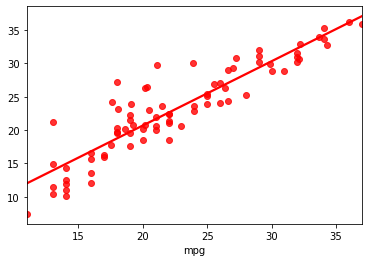

In [81]:
sn.regplot(x=y_test, y=prediction, ci=None, color="r")

#### Model Evaluation
We evaluate the performance of the model with RMSE(Root Mean Square Error) and R-squared score

In [68]:
# RMSE error value
mean_square = mean_squared_error(y_test, prediction)
rmse = np.sqrt(mean_square)
print("RMSE value: {:.4f}".format(rmse))

RMSE value: 2.8986


    -Lower values of RMSE indicate better fit of data.
    -RMSE value of 2.9 is a good fit of data.

In [70]:
# R-squared value
print ("R2 Score value: {:.4f}".format(r2_score(y_test, prediction)))

R2 Score value: 0.7949


    - In general, the higher the R2 Score value, the better the model fits the data.
    - 0.79 indicates a good fit of data.

#### Conclusion

    - Both the evaluation metrics indicates this is a good fit of data.
    - This is a descent model with 79% accuracy.
    - Still we can improve the accuracy of the model by doing feature engineering.